
# Week 1: Data Preparation & Initial Exploration
**Dataset:** creditcard.csv  
**Objective:** Extract, load, profile, clean and analyze class imbalance.


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# adjust as needed
FILE_PATH = 'creditcard.csv'

df = pd.read_csv(FILE_PATH)
print("Loaded data shape:", df.shape)


Loaded data shape: (284807, 31)


## 1. Initial Profiling

In [5]:

df.info()
df.describe(include='all').T

missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values by column:")
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 2. Basic Data Cleaning

In [6]:

duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("New shape after dropping duplicates:", df.shape)

# Convert 'Time' (seconds from first transaction) into hours/day_of_week
df['hour'] = (df['Time'] // 3600) % 24
df['day_of_week'] = (df['Time'] // (3600*24)) % 7


Number of duplicate rows: 1081
New shape after dropping duplicates: (283726, 31)


## 3. Class Imbalance Analysis

Transaction class counts:
Class
0    283253
1       473
Name: count, dtype: int64
Proportions:
Class
0    0.998333
1    0.001667
Name: count, dtype: float64


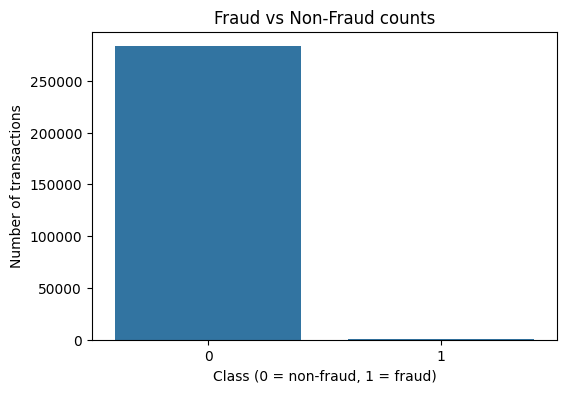

In [7]:

fraud_counts = df['Class'].value_counts()
print("Transaction class counts:")
print(fraud_counts)
print("Proportions:")
print(fraud_counts / len(df))

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title('Fraud vs Non‑Fraud counts')
plt.xlabel('Class (0 = non‑fraud, 1 = fraud)')
plt.ylabel('Number of transactions')
plt.show()


## 4. Basic Exploratory Plots

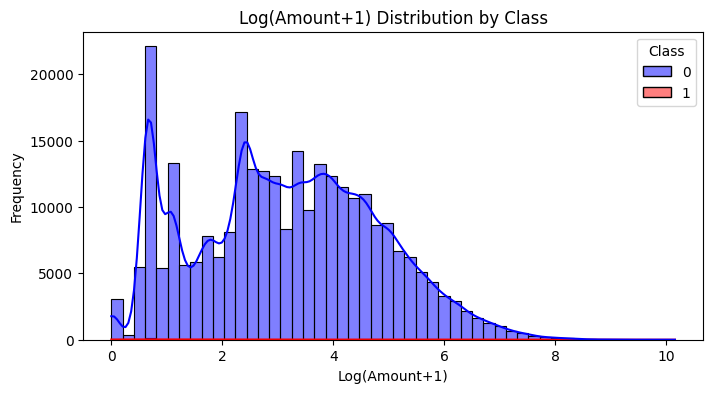

C:\Users\bhara\AppData\Local\Temp\ipykernel_20260\214022721.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount',


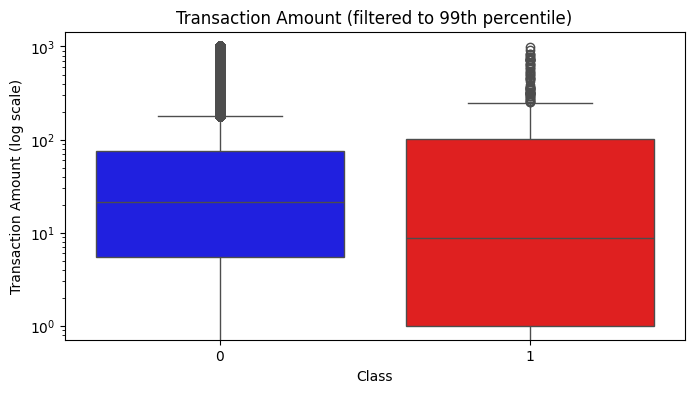

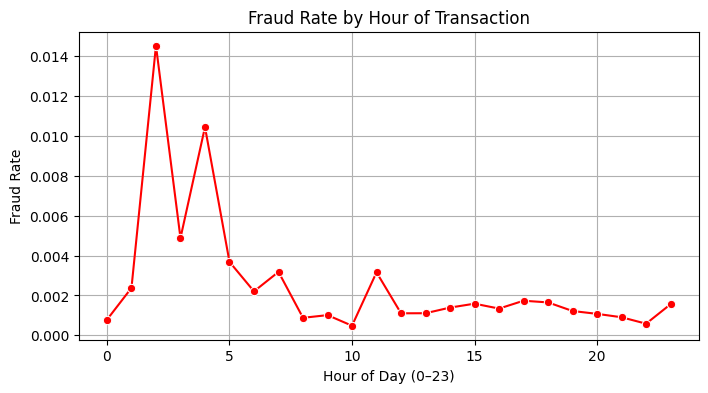

C:\Users\bhara\AppData\Local\Temp\ipykernel_20260\214022721.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily, x='day_of_week', y='Class', palette='coolwarm')


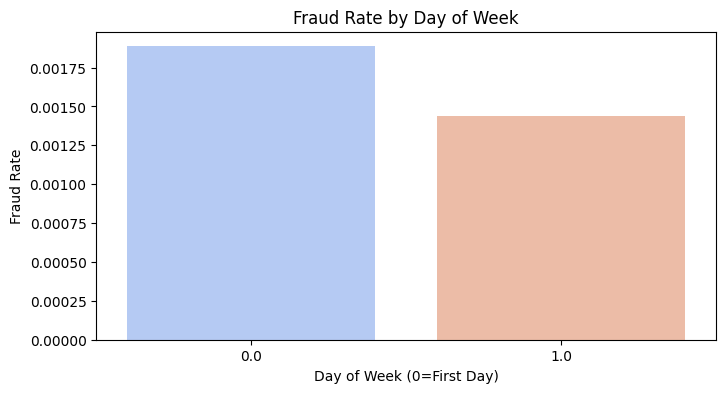

In [10]:
# =============================
# 4️⃣ Exploratory Visualizations
# =============================

# Log-transform the Amount column for better scale visualization
df['LogAmount'] = np.log1p(df['Amount'])

# --- Histogram of Log Amount by Class ---
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='LogAmount', bins=50, hue='Class', palette=['blue','red'], kde=True)
plt.title('Log(Amount+1) Distribution by Class')
plt.xlabel('Log(Amount+1)')
plt.ylabel('Frequency')
plt.show()

# --- Boxplot (Filtered to remove extreme outliers) ---
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', 
            data=df[df['Amount'] < df['Amount'].quantile(0.99)],
            palette=['blue','red'])
plt.yscale('log')
plt.title('Transaction Amount (filtered to 99th percentile)')
plt.xlabel('Class')
plt.ylabel('Transaction Amount (log scale)')
plt.show()

# --- Fraud rate by hour ---
hourly = df.groupby('hour')['Class'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=hourly, x='hour', y='Class', marker='o', color='red')
plt.title('Fraud Rate by Hour of Transaction')
plt.ylabel('Fraud Rate')
plt.xlabel('Hour of Day (0–23)')
plt.grid(True)
plt.show()

# --- Fraud rate by day of week ---
daily = df.groupby('day_of_week')['Class'].mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=daily, x='day_of_week', y='Class', palette='coolwarm')
plt.title('Fraud Rate by Day of Week')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of Week (0=First Day)')
plt.show()

## 5. Save Cleaned Data

In [9]:

CLEANED_PATH = 'transactions_cleaned_week1.csv'
df.to_csv(CLEANED_PATH, index=False)
print(f"Cleaned data saved to {CLEANED_PATH}")


Cleaned data saved to transactions_cleaned_week1.csv



## 6. Summary
Write your short summary here:
- Findings in profiling (data types, missing values, duplicates)  
- Cleaning steps taken  
- Class distribution and imbalance observations  
- Early insights from plots  
- Plans for Week 2 (univariate/bivariate EDA)
